In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
 


In [2]:
df = pd.read_csv('spotify.xls',index_col = 0)

In [31]:
df

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_996,8,0,11,10,1,10,13,13,10,6,...,10,0,8,4,0,7,13,7,2,6
user_997,7,6,9,6,15,6,14,2,9,7,...,15,9,2,2,6,1,0,5,15,11
user_998,6,2,1,5,1,7,2,4,4,0,...,0,13,6,13,0,1,11,13,6,13
user_999,7,0,8,12,6,2,6,2,0,12,...,14,7,12,3,5,15,5,11,9,12


In [3]:
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
df.shape

(1000, 5000)

#### build a recommendation  engine using a user listining history

In [5]:
from platform import python_version
print(python_version())

3.9.12


In [6]:
x = df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

In [7]:
nmf = NMF(n_components = 100,max_iter = 1000 ,random_state = 3)

In [8]:
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=3)

In [9]:
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

In [10]:
song_matrix.shape

(5000, 100)

In [11]:
user_matrix.shape

(1000, 100)

## steps to build recommender system - type 1(for local lib. or small data set)
1. consider recommending system to first user(row locstion 0 in user matrix)
2.find eculidean distance between this first user and remaining 999 user.
3. find top 10 songd heard by nearest 5 users.
4. recommend this 10 songs to user.


In [12]:
### calculating distance between 2 users

In [13]:
def col_dist(u1,u2):
    return pow(sum(pow(u1[x] - u2[x],2 ) for x in range(len(u1))),0.5)

In [14]:
col_dist(user_matrix[0],user_matrix[1])

17.066386601817882

In [15]:
user_matrix

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447002, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [16]:
song_matrix

array([[0.09154476, 0.02084876, 0.06170426, ..., 0.20525732, 0.02089963,
        0.42266527],
       [0.29410861, 0.        , 0.01635891, ..., 0.00535885, 0.25048781,
        0.28966942],
       [0.00182988, 0.16233797, 0.00882299, ..., 0.        , 0.0265591 ,
        0.15587654],
       ...,
       [0.37753494, 0.4043987 , 0.38341127, ..., 0.        , 0.49498818,
        0.        ],
       [0.        , 0.15106911, 0.        , ..., 0.34925875, 0.46747326,
        0.36724356],
       [0.09094906, 0.15572379, 0.        , ..., 0.30544496, 0.21424152,
        0.38353537]])

In [17]:
def distance_from_rem_users(buser,user_matrix):
    dist = []
    for i in range(len(user_matrix)):
        if buser != i:
            dist.append(col_dist(user_matrix[buser],user_matrix[i]))
    return dist

In [18]:
dist_user1 = distance_from_rem_users(0,user_matrix)

In [19]:
dist_user1

[17.066386601817882,
 15.356075621161388,
 15.860626597600104,
 15.085478038119959,
 13.844410784134242,
 14.938304994872142,
 13.250608547863019,
 16.8483701120043,
 15.146562759786132,
 15.085160716165987,
 15.42611394735445,
 15.162198319993305,
 8.9153693163871,
 16.067019686381638,
 14.192876182784433,
 12.163103730141339,
 15.342023559163797,
 15.107063798255247,
 12.39826262649489,
 13.014577302693686,
 15.558351009183552,
 15.606333530774458,
 16.15773243631625,
 16.372436321734973,
 15.742562231443149,
 15.287379336783877,
 14.678932332321972,
 13.958180490114,
 16.3537686291464,
 16.167950463766193,
 15.592805869767657,
 15.30025556767602,
 14.81345827632753,
 14.672279075810978,
 14.966327527059748,
 14.957592291590707,
 15.289917564906428,
 15.751052101010082,
 15.536270214987628,
 13.989176492627784,
 15.584294899872452,
 14.422344103243137,
 14.029914555377378,
 14.498613244133248,
 15.124960994485974,
 14.030779564645517,
 12.413550520347128,
 14.918957038473676,
 13.491

# finding nearest 5 users

In [20]:
nearest_users = np.argsort(dist_user1)[:5]

In [21]:
nearest_users[0:6]

array([ 12, 613, 665, 913, 394], dtype=int64)

In [32]:
for i in range(len(nearest_users)):
    nearest_users[i] += 1
print(nearest_users)

[ 14 615 667 915 396]


### finding the most heard songs by this user

In [33]:
for i in nearest_users:
    print('songs heared by user',i,'are: ')
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)

songs heared by user 14 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4709)
songs heared by user 615 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_11', 'song_12',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4663)
songs heared by user 667 are: 
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', le

### picking out top 10 songs from above list of songs

In [24]:
def topNsongs(nearest_users,df,N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    #print(dict1)
    
    #converting every key-value pair into a tuple and swapingthem for sorting purpose,
    #end result is a list of songs and no. of
    sorted_dict = sorted(dict1.items(),key = lambda keyvalue: (keyvalue[1],keyvalue[0]),reverse = True)[:N]
    print(sorted_dict)
    return[x[1] for x in sorted_dict]
    #return 0
    


In [25]:
topNsongs(nearest_users,df,10)

[('song_998', 15), ('song_990', 15), ('song_99', 15), ('song_988', 15), ('song_987', 15), ('song_986', 15), ('song_985', 15), ('song_982', 15), ('song_979', 15), ('song_968', 15)]


[15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

### top 2 recommendation system for large data-sets
### K-means clustring

In [26]:
WCSS = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters = k,max_iter = 1000).fit(song_matrix)
    WCSS[k] = kmeans.inertia_

In [27]:
WCSS

{1: 14072.22680086353,
 2: 13901.133312918795,
 3: 13773.674105344026,
 4: 13679.222862924065,
 5: 13596.706231387503,
 6: 13519.038010147307,
 7: 13458.289751028777,
 8: 13397.841125262423,
 9: 13348.89494686775,
 10: 13305.908065211708,
 11: 13273.797035239473,
 12: 13237.047448757456,
 13: 13204.306985026758,
 14: 13161.949306890772,
 15: 13144.461830672417,
 16: 13115.700447930198,
 17: 13097.47655921466,
 18: 13084.762325683649,
 19: 13057.472927351484,
 20: 13036.341183879966,
 21: 13021.587287921024,
 22: 13001.589764076698,
 23: 12994.290638920509,
 24: 12967.963563929576,
 25: 12953.823910449955,
 26: 12938.02195093323,
 27: 12928.29691565688,
 28: 12893.651039604845,
 29: 12903.953819899605,
 30: 12877.385340335604,
 31: 12864.689115351135,
 32: 12851.320451896388,
 33: 12842.278897287973,
 34: 12824.513678743973,
 35: 12816.710765845271,
 36: 12789.318474826934,
 37: 12784.71673802285,
 38: 12777.490253650936,
 39: 12765.273169265789,
 40: 12759.36230819699,
 41: 12748.40012

Text(0, 0.5, 'WCSS')

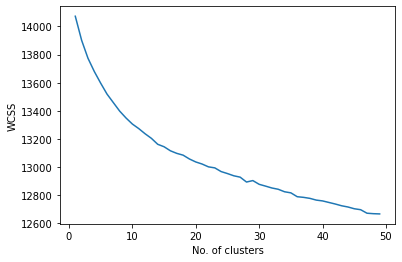

In [28]:
plt.plot(WCSS.keys(),WCSS.values())
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')

In [29]:
def songs_in_cluster(N_clusters,df,song_matrix,song_name,n_recommendation):
    kmeans = KMeans(n_clusters = k,max_iter = 1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print(index_in_song)
    song_vector = song_matrix[index_in_song]
    #print(song_vector)
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    #finding songs which belong to same cluster as of song passed in song name
    songs_in_selected_cluster = [x for x in range(len(all_songs_in_cluster ))
                                if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    #print(len(songs_in_selected_cluster))
    
    song_cluster = song_matrix[songs_in_selected_cluster]
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors= n_recommendation)
    neighbors.fit(song_cluster)
    
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    #print(recommended_songs[1][[0]]
    
    songs = df.columns
    return[songs[x] for x in recommended_songs[1][0]]

In [30]:
songs_in_cluster(15,df,song_matrix,'song_5',5)

['song_1', 'song_76', 'song_90', 'song_27', 'song_41']